# Introdução à Ciência dos Dados &mdash; Projeto Final

Alunos: Artur Franco (anf), Lucas Glasner (lgr3)

## 2 &mdash; Análise exploratória dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

% matplotlib inline

In [118]:
# Lendo datasets tratados
acidentes2016 = pd.read_csv('treated-datasets/acidentes-2016.csv', sep=',', index_col=0)
acidentes2015 = pd.read_csv('treated-datasets/acidentes-2015.csv', sep=',', index_col=0)
multas2016 = pd.read_csv('treated-datasets/infracoes-transito-2016.csv', sep=',', index_col=0)
multas2015 = pd.read_csv('treated-datasets/infracoes-transito-2015.csv', sep=',', index_col=0)

print('DATASET REFERENTE AOS ACIDENTES DE TRÂNSITO EM RECIFE/2016')
display(acidentes2016.head())
print(' ')
print('DATASET REFERENTE AOS ACIDENTES DE TRÂNSITO EM RECIFE/2015')
display(acidentes2015.head())
print(' ')
print('DATASET REFERENTE AOS REGISTROS DE INFRAÇÕES DE TRÂNSITO EM RECIFE/2016')
display(multas2016.head())
print(' ')
print('DATASET REFERENTE AOS REGISTROS DE INFRAÇÕES DE TRÂNSITO EM RECIFE/2015')
display(multas2015.head())

DATASET REFERENTE AOS ACIDENTES DE TRÂNSITO EM RECIFE/2016


,data,hora,endereco,bairro,natureza,tipo
0,2016-01-01,00:58,Av Jornalista Possidonio Cavalcanti Bastos,Iputinga,COLISÃO,SEM VÍTIMA
1,2016-01-01,01:23,Av Engenheiro Domingos Ferreira,Boa Viagem,COLISÃO,SEM VÍTIMA
2,2016-01-01,01:42,Rua Dr Alvaro Ferraz,Jordão,COLISÃO,SEM VÍTIMA
3,2016-01-01,03:08,Av Jornalista Costa Porto,Ibura,COLISÃO,SEM VÍTIMA
4,2016-01-01,05:34,Av Governador Agamenon Magalhaes,Paissandu,CHOQUE,COM VÍTIMA


 
DATASET REFERENTE AOS ACIDENTES DE TRÂNSITO EM RECIFE/2015


,data,hora,endereco,bairro,natureza,tipo
0,2015-12-03,11:36,Av Norte,Casa Amarela,COLISÃO,SEM VÍTIMA
1,2015-06-01,06:35,Est De Belem,Encruzilhada,COLISÃO,SEM VÍTIMA
2,2015-06-01,08:04,Rua Ernesto De Paula Santos,Boa Viagem,COLISÃO,SEM VÍTIMA
3,2015-06-01,08:06,Av Sul,Afogados,COLISÃO,SEM VÍTIMA
4,2015-06-01,08:13,Rua Benfica,Madalena,COLISÃO,SEM VÍTIMA


 
DATASET REFERENTE AOS REGISTROS DE INFRAÇÕES DE TRÂNSITO EM RECIFE/2016


,data_infracao,hora_infracao,data_implantacao,agente_equipamento
0,2015-12-30,11:10,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL
1,2015-12-20,08:20,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL
2,2015-12-24,20:15,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL
3,2015-12-28,13:50,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL
4,2015-12-28,13:55,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL


 
DATASET REFERENTE AOS REGISTROS DE INFRAÇÕES DE TRÂNSITO EM RECIFE/2015


,data_infracao,hora_infracao,data_implantacao,agente_equipamento
0,2015-10-26,08:42,2015-11-03,Código 6 - AUTOS NO TALÃO MANUAL
1,2015-10-26,08:45,2015-11-03,Código 6 - AUTOS NO TALÃO MANUAL
2,2015-10-26,08:48,2015-11-03,Código 6 - AUTOS NO TALÃO MANUAL
3,2015-10-26,08:55,2015-11-03,Código 6 - AUTOS NO TALÃO MANUAL
4,2015-10-26,09:10,2015-11-03,Código 6 - AUTOS NO TALÃO MANUAL


In [119]:
print('{} acidentes de trânsito foram registrados na cidade do Recife em 2015'.format(acidentes2015.shape[0]))
print('{} acidentes de trânsito foram registrados na cidade do Recife em 2016'.format(acidentes2016.shape[0]))

crescimento = acidentes2016.shape[0] - acidentes2015.shape[0]
porcentagem_crescimento = round((crescimento*100)/acidentes2015.shape[0],2)
print('OBS: crescimento de {}% no número de acidentes de trânsito em Recife'.format(porcentagem_crescimento))

print(' ')

print('{} infrações de trânsito foram registradas na cidade do Recife em 2015'.format(multas2015.shape[0]))
print('{} infrações de trânsito foram registradas na cidade do Recife em 2016'.format(multas2016.shape[0]))

crescimento = multas2016.shape[0] - multas2015.shape[0]
porcentagem_crescimento = round((crescimento*100)/multas2015.shape[0],2)
print('OBS: decaimento de {}% no número de infrações de trânsito registradas em Recife'.format(abs(porcentagem_crescimento)))

7169 acidentes de trânsito foram registrados na cidade do Recife em 2015
9130 acidentes de trânsito foram registrados na cidade do Recife em 2016
OBS: crescimento de 27.35% no número de acidentes de trânsito em Recife
 
629158 infrações de trânsito foram registradas na cidade do Recife em 2015
570798 infrações de trânsito foram registradas na cidade do Recife em 2016
OBS: decaimento de 9.28% no número de infrações de trânsito registradas em Recife


In [120]:
# Calculando algumas modas
bairro_moda2016 = acidentes2016.bairro.mode()[0]
qtd_bairro2016 = acidentes2016.groupby('bairro').size().sort_values(ascending=False)[0]

endereco_moda2016 = acidentes2016.endereco.mode()[0]
qtd_endereco2016 = acidentes2016.groupby('endereco').size().sort_values(ascending=False)[0]

bairro_moda2015 = acidentes2015.bairro.mode()[0]
qtd_bairro2015 = acidentes2015.groupby('bairro').size().sort_values(ascending=False)[0]

endereco_moda2015 = acidentes2015.endereco.mode()[0]
qtd_endereco2015 = acidentes2015.groupby('endereco').size().sort_values(ascending=False)[0]

equip_moda2016 = multas2016.agente_equipamento.mode()[0]
qtd_equip2016 = multas2016.groupby('agente_equipamento').size().sort_values(ascending=False)[0]

equip_moda2015 = multas2015.agente_equipamento.mode()[0]
qtd_equip2015 = multas2015.groupby('agente_equipamento').size().sort_values(ascending=False)[0]

# Calculando algumas porcentagens
pct_bairro2016 = round(qtd_bairro2016*100.0/acidentes2016.shape[0], 2)
pct_bairro2015 = round(qtd_bairro2015*100.0/acidentes2015.shape[0], 2)
pct_endereco2016 = round(qtd_endereco2016*100.0/acidentes2016.shape[0], 2)
pct_endereco2015 = round(qtd_endereco2015*100.0/acidentes2015.shape[0], 2)
pct_equip2016 = round(qtd_equip2016*100.0/multas2016.shape[0], 2)
pct_equip2015 = round(qtd_equip2015*100.0/multas2015.shape[0], 2)

print('---BAIRROS ONDE MAIS OCORRERAM ACIDENTES---')
print('2016: {} - {} (ou {}% dos) acidentes'.format(bairro_moda2016, qtd_bairro2016, pct_bairro2016))
print('2015: {} - {} (ou {}% dos) acidentes'.format(bairro_moda2015, qtd_bairro2015, pct_bairro2015))
print(' ')
print('---ENDEREÇOS ONDE MAIS OCORRERAM ACIDENTES---')
print('2016: {} - {} (ou {}% dos) acidentes'.format(endereco_moda2016, qtd_endereco2016, pct_endereco2016))
print('2015: {} - {} (ou {}% dos) acidentes'.format(endereco_moda2015, qtd_endereco2015, pct_endereco2016))

---BAIRROS ONDE MAIS OCORRERAM ACIDENTES---
2016: Boa Viagem - 1297 (ou 14.21% dos) acidentes
2015: Boa Viagem - 943 (ou 13.15% dos) acidentes
 
---ENDEREÇOS ONDE MAIS OCORRERAM ACIDENTES---
2016: Av Governador Agamenon Magalhaes - 394 (ou 4.32% dos) acidentes
2015: Av Marechal Mascarenhas De Moraes - 346 (ou 4.32% dos) acidentes


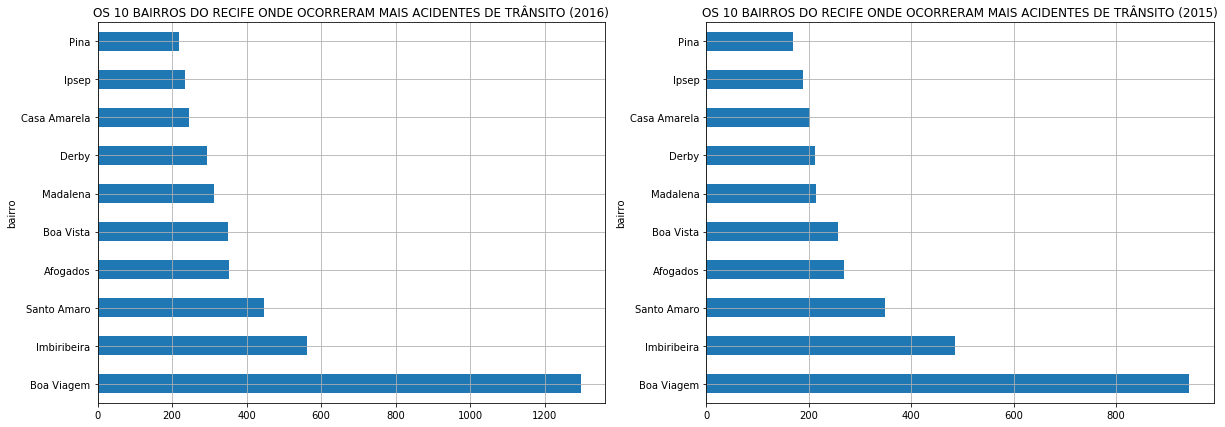

In [121]:
fig, ax = plt.subplots(ncols=2,figsize=(20,7))
top10_bairros2016 = acidentes2016.groupby('bairro').size().sort_values(ascending=False)[:10]
top10_bairros2016.plot.barh(title='OS 10 BAIRROS DO RECIFE ONDE OCORRERAM MAIS ACIDENTES DE TRÂNSITO (2016)', 
                            grid=True, ax=ax[0])
top10_bairros2015 = acidentes2015.groupby('bairro').size().sort_values(ascending=False)[:10]
top10_bairros2015.plot.barh(title='OS 10 BAIRROS DO RECIFE ONDE OCORRERAM MAIS ACIDENTES DE TRÂNSITO (2015)',
                            grid=True, ax=ax[1])

In [122]:
def criaRangeHora(hora):
    h = hora[:2]
    if h[0] == '0':
        if h[1] == '9':
            return '[' + h + 'h, ' + str(int(h[:2])+1) + 'h)'
        else:
            return '[' + h + 'h, 0' + str(int(h[:2])+1) + 'h)'
    elif h[0] == '2':
        if h[1] == '3':
            return '[' + h + 'h, 00h)'
        else:
            return '[' + h + 'h, ' + str(int(h[:2])+1) + 'h)'
    else:
        return '[' + h + 'h, ' + str(int(h[:2])+1) + 'h)'

def periodoDoDia(hora):
    h = hora[:2]
    manha = ['06','07','08','09','10','11']
    tarde = ['12','13','14','15','16','17']
    noite = ['18','19','20','21','22','23']
    
    if h in manha:
        return 'manhã'
    elif h in tarde:
        return 'tarde'
    elif h in noite:
        return 'noite'
    else:
        return 'madrugada'

def retornaMes(data):
    mes = data.split('-')[1]
    
    if mes == '01':
        return 'Jan'
    elif mes == '02':
        return 'Fev'
    elif mes == '03':
        return 'Mar'
    elif mes == '04':
        return 'Abr'
    elif mes == '05':
        return 'Mai'
    elif mes == '06':
        return 'Jun'
    elif mes == '07':
        return 'Jul'
    elif mes == '08':
        return 'Ago'
    elif mes == '09':
        return 'Set'
    elif mes == '10':
        return 'Out'
    elif mes == '11':
        return 'Nov'
    else:
        return 'Dez'

In [129]:
acidentes2016['range_hora'] = acidentes2016['hora'].apply(lambda x: criaRangeHora(x))
acidentes2016['periodo'] = acidentes2016['hora'].apply(lambda x: periodoDoDia(x))
acidentes2016['mes'] = acidentes2016['data'].apply(lambda x: retornaMes(x))
acidentes2016.head()

,data,hora,endereco,bairro,natureza,tipo,range_hora,periodo,mes
0,2016-01-01,00:58,Av Jornalista Possidonio Cavalcanti Bastos,Iputinga,COLISÃO,SEM VÍTIMA,"[00h, 01h)",madrugada,Jan
1,2016-01-01,01:23,Av Engenheiro Domingos Ferreira,Boa Viagem,COLISÃO,SEM VÍTIMA,"[01h, 02h)",madrugada,Jan
2,2016-01-01,01:42,Rua Dr Alvaro Ferraz,Jordão,COLISÃO,SEM VÍTIMA,"[01h, 02h)",madrugada,Jan
3,2016-01-01,03:08,Av Jornalista Costa Porto,Ibura,COLISÃO,SEM VÍTIMA,"[03h, 04h)",madrugada,Jan
4,2016-01-01,05:34,Av Governador Agamenon Magalhaes,Paissandu,CHOQUE,COM VÍTIMA,"[05h, 06h)",madrugada,Jan


In [130]:
acidentes2015['range_hora'] = acidentes2015['hora'].apply(lambda x: criaRangeHora(x))
acidentes2015['periodo'] = acidentes2015['hora'].apply(lambda x: periodoDoDia(x))
acidentes2015['mes'] = acidentes2015['data'].apply(lambda x: retornaMes(x))
acidentes2015.head()

,data,hora,endereco,bairro,natureza,tipo,range_hora,periodo,mes
0,2015-12-03,11:36,Av Norte,Casa Amarela,COLISÃO,SEM VÍTIMA,"[11h, 12h)",manhã,Dez
1,2015-06-01,06:35,Est De Belem,Encruzilhada,COLISÃO,SEM VÍTIMA,"[06h, 07h)",manhã,Jun
2,2015-06-01,08:04,Rua Ernesto De Paula Santos,Boa Viagem,COLISÃO,SEM VÍTIMA,"[08h, 09h)",manhã,Jun
3,2015-06-01,08:06,Av Sul,Afogados,COLISÃO,SEM VÍTIMA,"[08h, 09h)",manhã,Jun
4,2015-06-01,08:13,Rua Benfica,Madalena,COLISÃO,SEM VÍTIMA,"[08h, 09h)",manhã,Jun


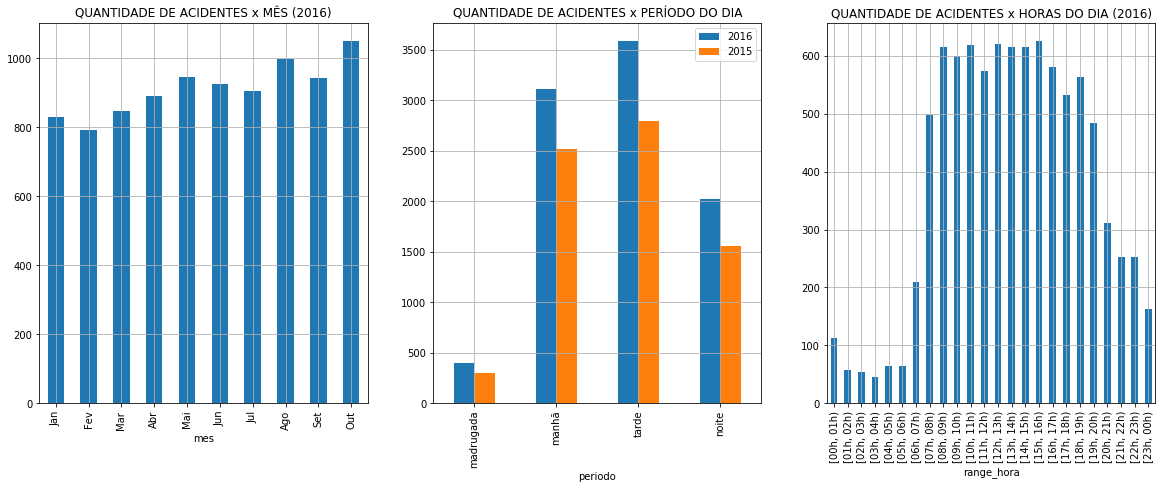

In [149]:
fig, ax = plt.subplots(ncols=3,figsize=(20,7))

meses = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out']
periodos = ['madrugada','manhã','tarde','noite']
horas = ['[00h, 01h)','[01h, 02h)','[02h, 03h)','[03h, 04h)','[04h, 05h)','[05h, 06h)','[06h, 07h)','[07h, 08h)',
        '[08h, 09h)','[09h, 10h)','[10h, 11h)','[11h, 12h)','[12h, 13h)','[13h, 14h)','[14h, 15h)','[15h, 16h)',
        '[16h, 17h)','[17h, 18h)','[18h, 19h)','[19h, 20h)','[20h, 21h)','[21h, 22h)','[22h, 23h)','[23h, 00h)']

acidentesXmes2016 = acidentes2016.groupby('mes').size()d
acidentesXmes2016 = acidentesXmes2016.reindex(meses)
acidentesXmes2016.plot.bar(title='QUANTIDADE DE ACIDENTES x MÊS (2016)', grid=True, ax=ax[0])

acidentesXperiodo2016 = acidentes2016.groupby('periodo').size()
acidentesXperiodo2016 = acidentesXperiodo2016.reindex(periodos)
acidentesXperiodo2015 = acidentes2015.groupby('periodo').size()
acidentesXperiodo2015 = acidentesXperiodo2015.reindex(periodos)
acidentesXperiodo2016 = acidentesXperiodo2016.to_frame()
acidentesXperiodo2015 = acidentesXperiodo2015.to_frame()
acidentesXperiodo2016.columns = ['2016']
acidentesXperiodo2015.columns = ['2015']
acidentesXperiodo = pd.concat([acidentesXperiodo2016, acidentesXperiodo2015], axis=1)
acidentesXperiodo.plot.bar(title='QUANTIDADE DE ACIDENTES x PERÍODO DO DIA', grid=True, ax=ax[1])

acidentesXhoras2016 = acidentes2016.groupby('range_hora').size()
acidentesXhoras2016 = acidentesXhoras2016.reindex(horas)
acidentesXhoras2016.plot.bar(title='QUANTIDADE DE ACIDENTES x HORAS DO DIA (2016)', grid=True, ax=ax[2])

In [116]:
print('---MEIOS QUE MAIS IMPLANTARAM MULTAS---')
print('2016: {} - {} (ou {}% das) infrações registradas'.format(equip_moda2016, qtd_equip2016, pct_equip2016))
print('2015: {} - {} (ou {}% das) infrações registradas'.format(equip_moda2015, qtd_equip2015, pct_equip2015))

---MEIOS QUE MAIS IMPLANTARAM MULTAS---
2016: Código 3 - LOMBADA ELETRÔNICA - 245458 (ou 43.0% das) infrações registradas
2015: Código 3 - LOMBADA ELETRÔNICA - 316780 (ou 50.35% das) infrações registradas


In [151]:
multas2016['range_hora'] = multas2016['hora_infracao'].apply(lambda x: criaRangeHora(x))
multas2016['periodo'] = multas2016['hora_infracao'].apply(lambda x: periodoDoDia(x))
multas2016['mes'] = multas2016['data_implantacao'].apply(lambda x: retornaMes(x))
multas2016.head()

,data_infracao,hora_infracao,data_implantacao,agente_equipamento,range_hora,periodo,mes
0,2015-12-30,11:10,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL,"[11h, 12h)",manhã,Jan
1,2015-12-20,08:20,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL,"[08h, 09h)",manhã,Jan
2,2015-12-24,20:15,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL,"[20h, 21h)",noite,Jan
3,2015-12-28,13:50,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL,"[13h, 14h)",tarde,Jan
4,2015-12-28,13:55,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL,"[13h, 14h)",tarde,Jan


In [152]:
multas2015['range_hora'] = multas2015['hora_infracao'].apply(lambda x: criaRangeHora(x))
multas2015['periodo'] = multas2015['hora_infracao'].apply(lambda x: periodoDoDia(x))
multas2015['mes'] = multas2015['data_implantacao'].apply(lambda x: retornaMes(x))
multas2015.head()

,data_infracao,hora_infracao,data_implantacao,agente_equipamento,range_hora,periodo,mes
0,2015-10-26,08:42,2015-11-03,Código 6 - AUTOS NO TALÃO MANUAL,"[08h, 09h)",manhã,Nov
1,2015-10-26,08:45,2015-11-03,Código 6 - AUTOS NO TALÃO MANUAL,"[08h, 09h)",manhã,Nov
2,2015-10-26,08:48,2015-11-03,Código 6 - AUTOS NO TALÃO MANUAL,"[08h, 09h)",manhã,Nov
3,2015-10-26,08:55,2015-11-03,Código 6 - AUTOS NO TALÃO MANUAL,"[08h, 09h)",manhã,Nov
4,2015-10-26,09:10,2015-11-03,Código 6 - AUTOS NO TALÃO MANUAL,"[09h, 10h)",manhã,Nov


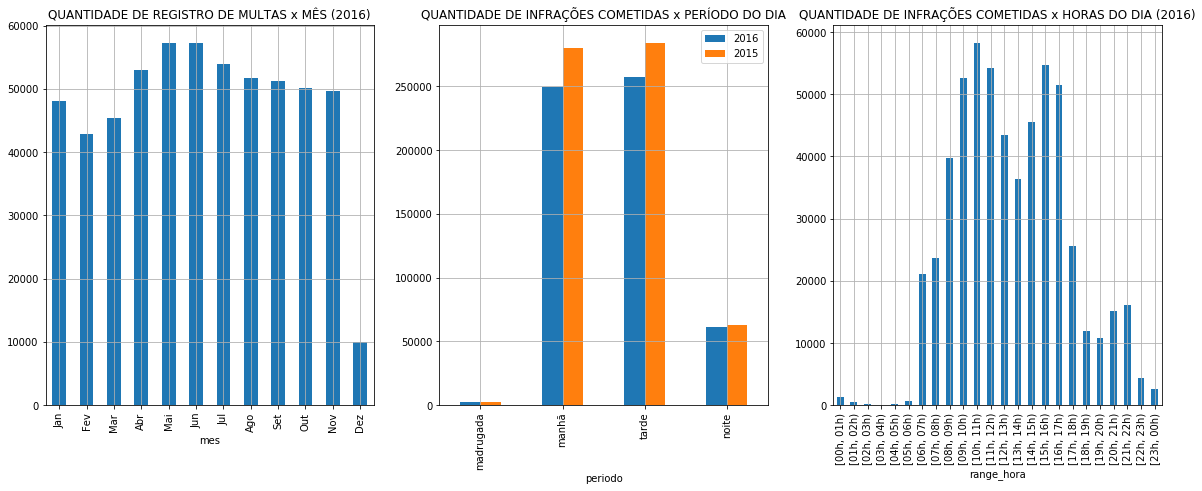

In [154]:
fig, ax = plt.subplots(ncols=3,figsize=(20,7))

meses = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']
periodos = ['madrugada','manhã','tarde','noite']
horas = ['[00h, 01h)','[01h, 02h)','[02h, 03h)','[03h, 04h)','[04h, 05h)','[05h, 06h)','[06h, 07h)','[07h, 08h)',
        '[08h, 09h)','[09h, 10h)','[10h, 11h)','[11h, 12h)','[12h, 13h)','[13h, 14h)','[14h, 15h)','[15h, 16h)',
        '[16h, 17h)','[17h, 18h)','[18h, 19h)','[19h, 20h)','[20h, 21h)','[21h, 22h)','[22h, 23h)','[23h, 00h)']

multasXmes2016 = multas2016.groupby('mes').size()
multasXmes2016 = multasXmes2016.reindex(meses)
multasXmes2016.plot.bar(title='QUANTIDADE DE REGISTRO DE MULTAS x MÊS (2016)', grid=True, ax=ax[0])

multasXperiodo2016 = multas2016.groupby('periodo').size()
multasXperiodo2016 = multasXperiodo2016.reindex(periodos)
multasXperiodo2015 = multas2015.groupby('periodo').size()
multasXperiodo2015 = multasXperiodo2015.reindex(periodos)
multasXperiodo2016 = multasXperiodo2016.to_frame()
multasXperiodo2015 = multasXperiodo2015.to_frame()
multasXperiodo2016.columns = ['2016']
multasXperiodo2015.columns = ['2015']
multasXperiodo = pd.concat([multasXperiodo2016, multasXperiodo2015], axis=1)
multasXperiodo.plot.bar(title='QUANTIDADE DE INFRAÇÕES COMETIDAS x PERÍODO DO DIA', grid=True, ax=ax[1])

multasXhoras2016 = multas2016.groupby('range_hora').size()
multasXhoras2016 = multasXhoras2016.reindex(horas)
multasXhoras2016.plot.bar(title='QUANTIDADE DE INFRAÇÕES COMETIDAS x HORAS DO DIA (2016)', grid=True, ax=ax[2])

In [88]:
# visualizacoes em gmaps    # geocode (nao reverse_geocode) queremos as coordenadas
from pygeocoder import Geocoder

# print(Geocoder.geocode('Boa Viagem'))


In [89]:
import geopandas as gpd
% matplotlib inline

df = gpd.read_file('treated-datasets/bairros-recife.geojson')


df.geometry

0     POLYGON ((-34.94415903693491 -8.04984630501870...
1     POLYGON ((-34.88631436680419 -8.05666534623588...
2     POLYGON ((-34.93946230936537 -8.04985487445870...
3     POLYGON ((-34.92838640724768 -8.09840048246644...
4     POLYGON ((-34.9467885752794 -8.109437663912132...
5     POLYGON ((-34.96139226388701 -8.02513918764976...
6     POLYGON ((-34.93788310398737 -8.05236462226287...
7     POLYGON ((-34.93395437764459 -8.02253763952410...
8     POLYGON ((-34.94615908753259 -8.05957875636651...
9     POLYGON ((-34.92175943879574 -8.06337593830606...
10    POLYGON ((-34.92241593873903 -8.10216638046822...
11    POLYGON ((-34.91624807711167 -7.98492211773716...
12    POLYGON ((-34.94218469814549 -7.99301728412624...
13    POLYGON ((-34.90159278925168 -8.03691466350813...
14    POLYGON ((-34.94373389628587 -8.07515487871467...
15    POLYGON ((-34.92534411302587 -8.09271014943841...
16    POLYGON ((-34.95636941670142 -8.08427071180410...
17    POLYGON ((-34.93772115291974 -8.0864317692

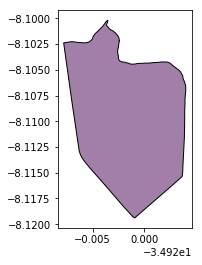

In [23]:
df[df.bairro_nome == 'Ipsep'].plot()